Exploratory Data Analysis on Cardiographic Dataset

1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


Load Dataset

In [2]:
df = pd.read_csv("/content/Cardiotocographic.csv")
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


3: Dataset Overview

Explanation:

Shows column names, data types, and missing values

Provides statistical summary (mean, std, min, max, quartiles)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
df.shape


(2126, 14)

In [5]:
df.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


4: Data Cleaning – Missing Values

In [6]:
# Check missing values
df.isnull().sum()


,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


Missing values handled using mean imputation

In [7]:
# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)


5: Data Type Consistency

In [8]:
df.dtypes


,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [9]:
# Convert all columns to numeric if needed
df = df.apply(pd.to_numeric, errors='coerce')

6: Outlier Detection (Boxplots)

Insight:

Extreme values visible in DL, DP, ASTV

Outliers may indicate fetal distress cases

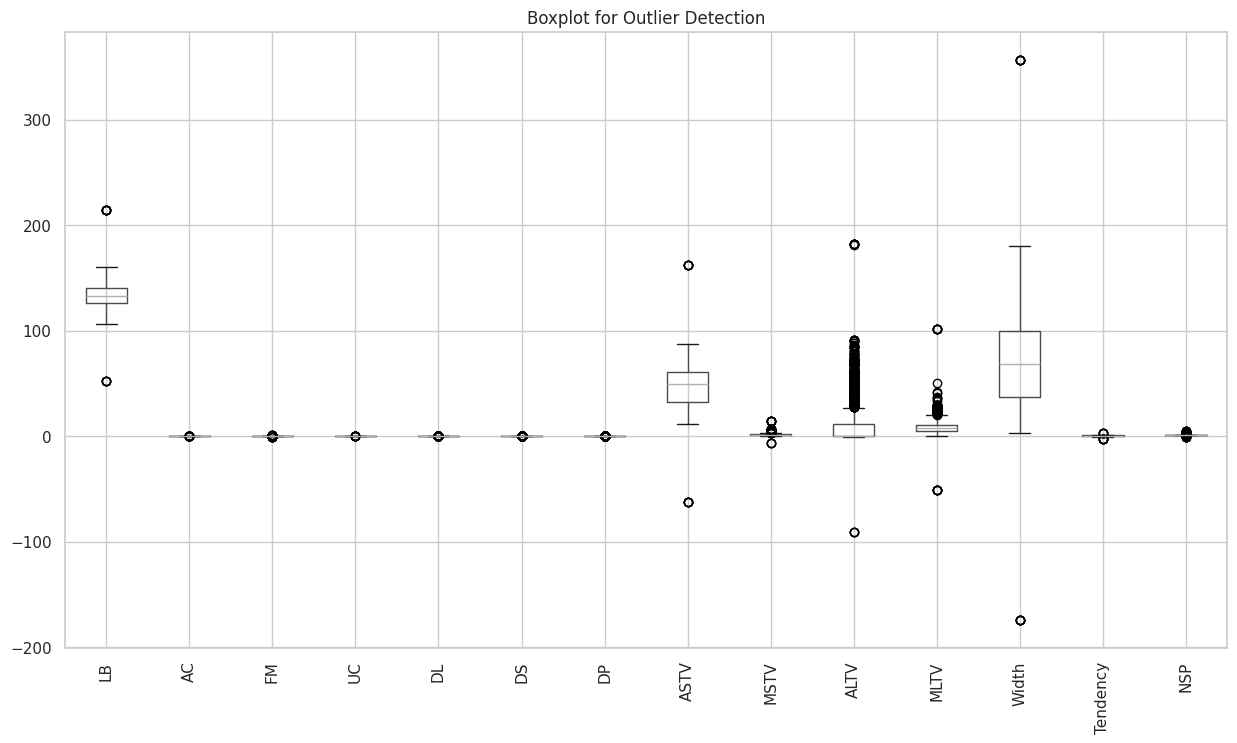

In [10]:
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


7: Histograms (Distribution Analysis)

Observations:

LB follows near-normal distribution

ASTV & ALTV are skewed

Variability features show wide dispersion

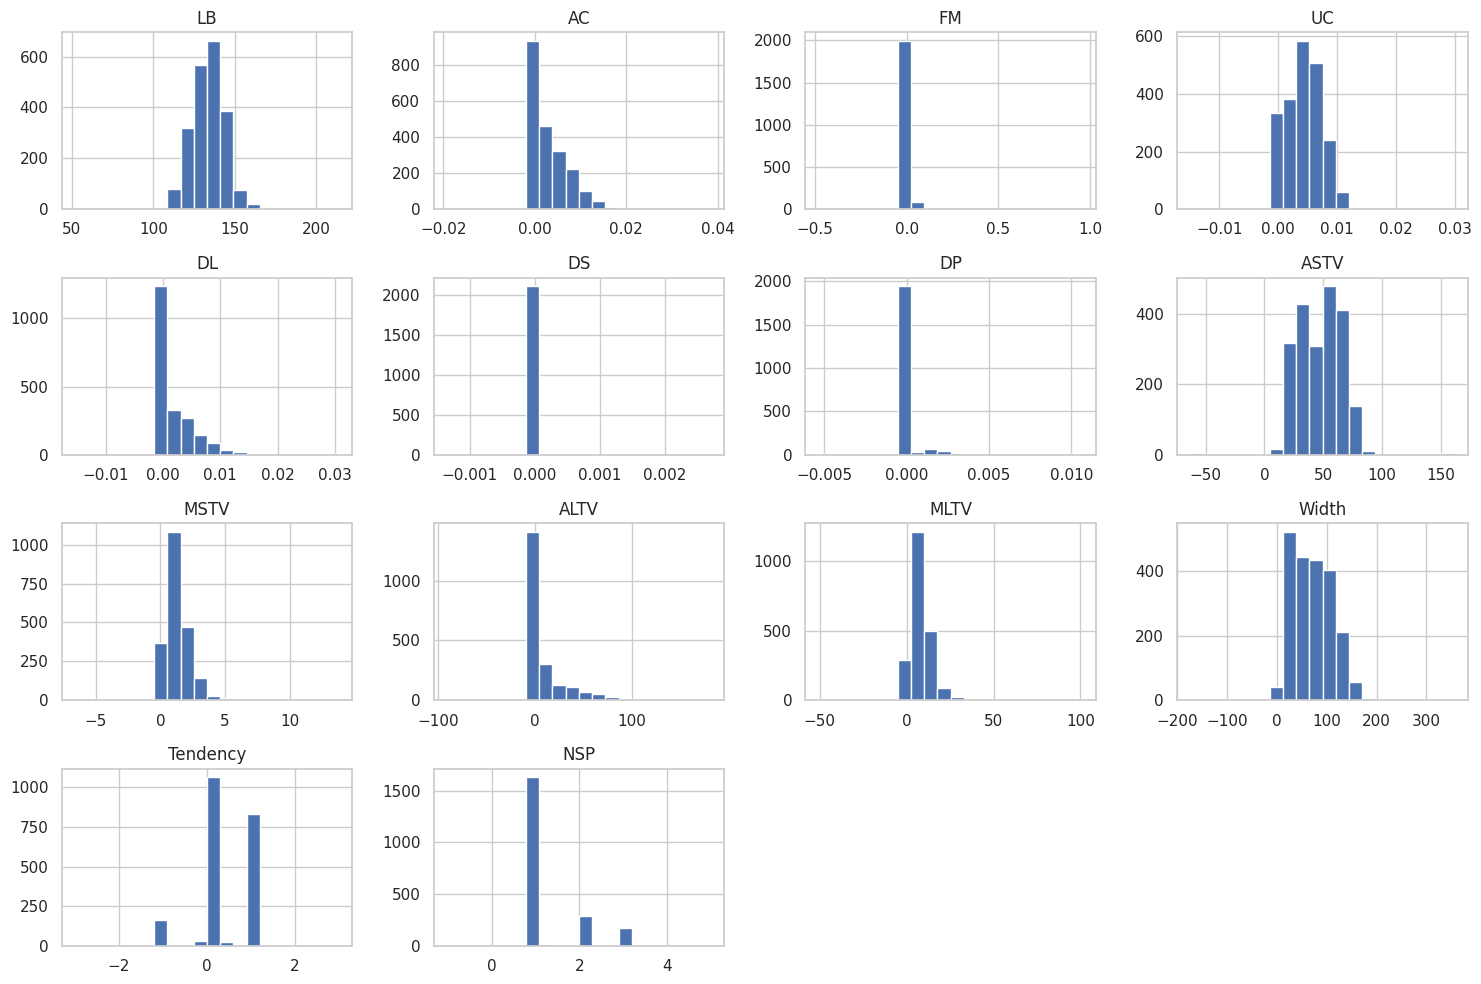

In [11]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


8: Correlation Heatmap

Insights:

Strong correlation between ASTV and MSTV

UC correlated with deceleration features

Useful for medical interpretation & prediction models

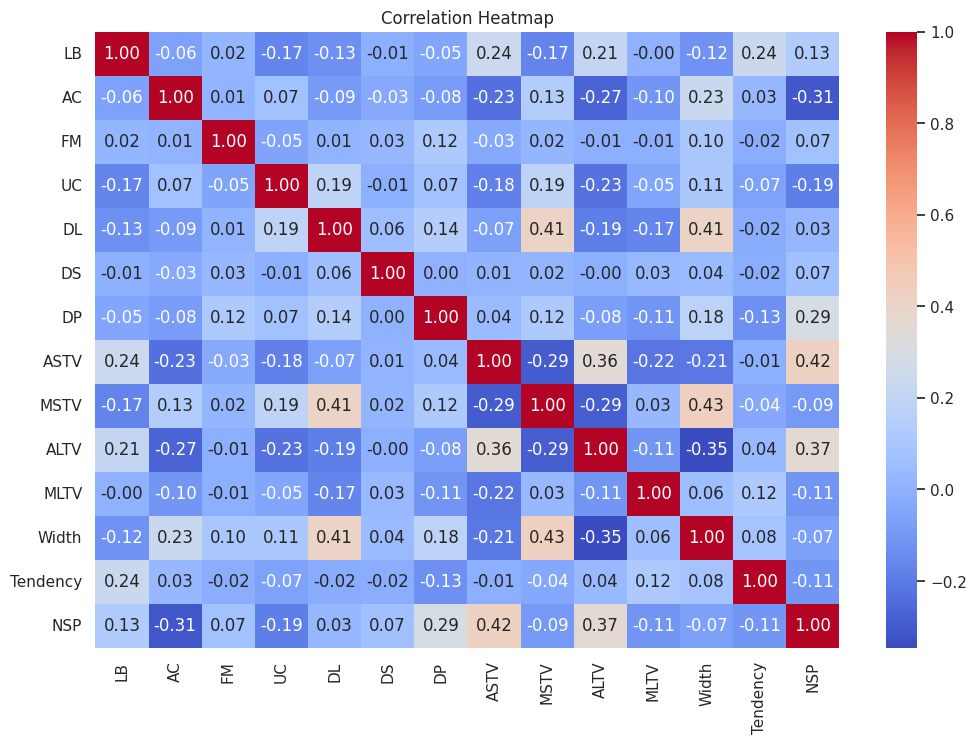

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


9: Pair Plot (Advanced Visualization)

Insight:

Reveals multivariate relationships

Helpful for feature selection

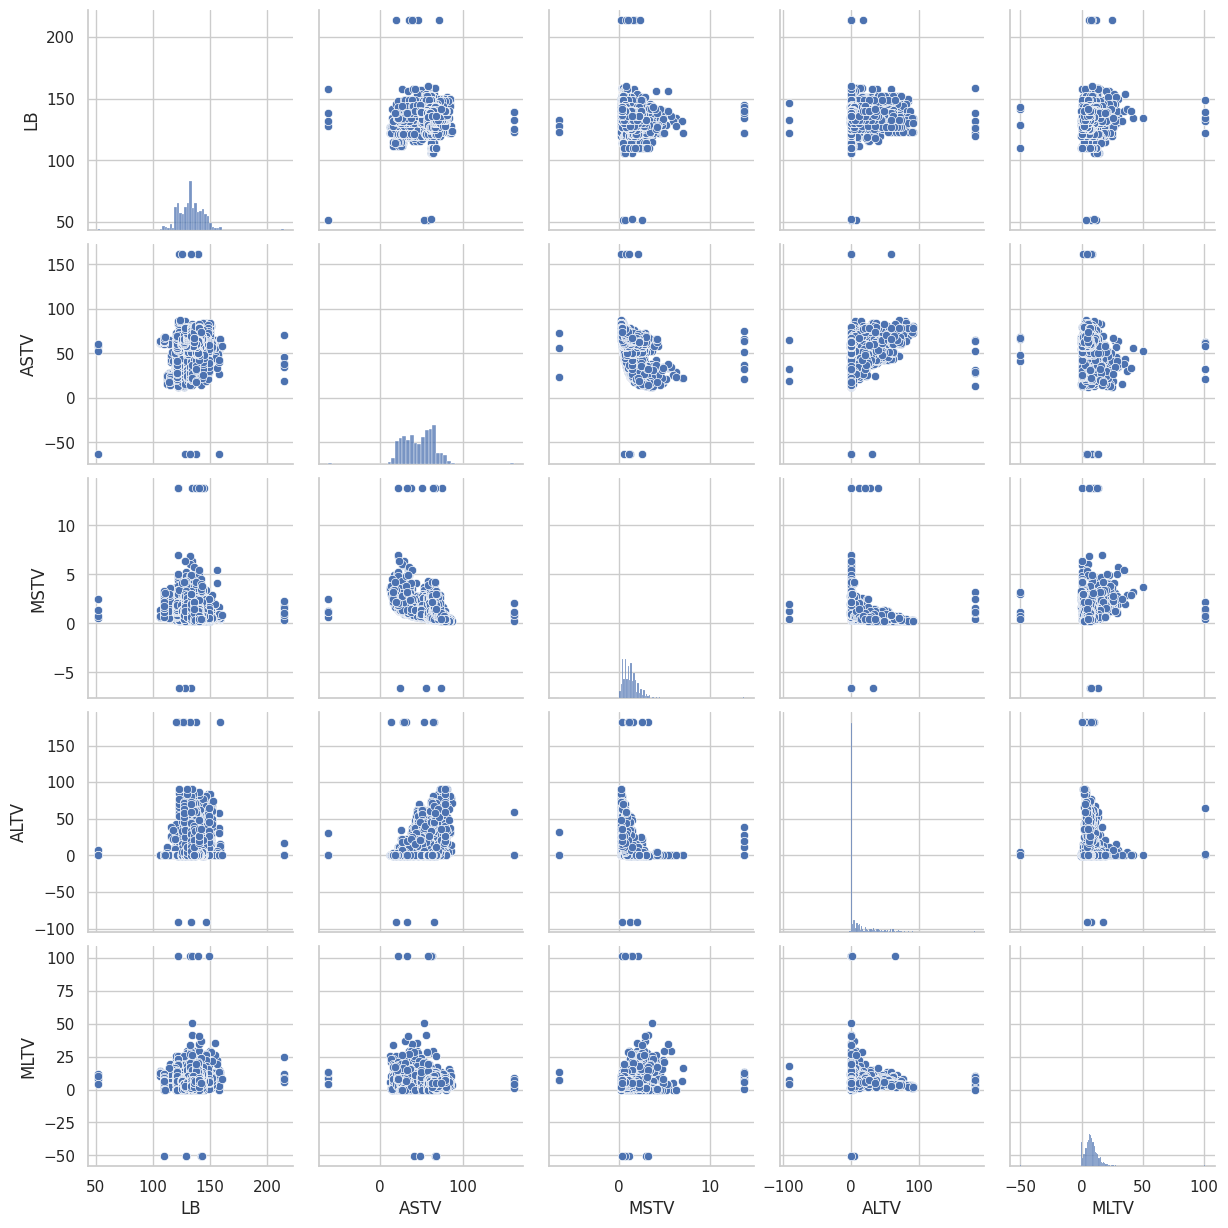

In [13]:
sns.pairplot(df[['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV']])
plt.show()


10: Violin Plots (Distribution + Density)

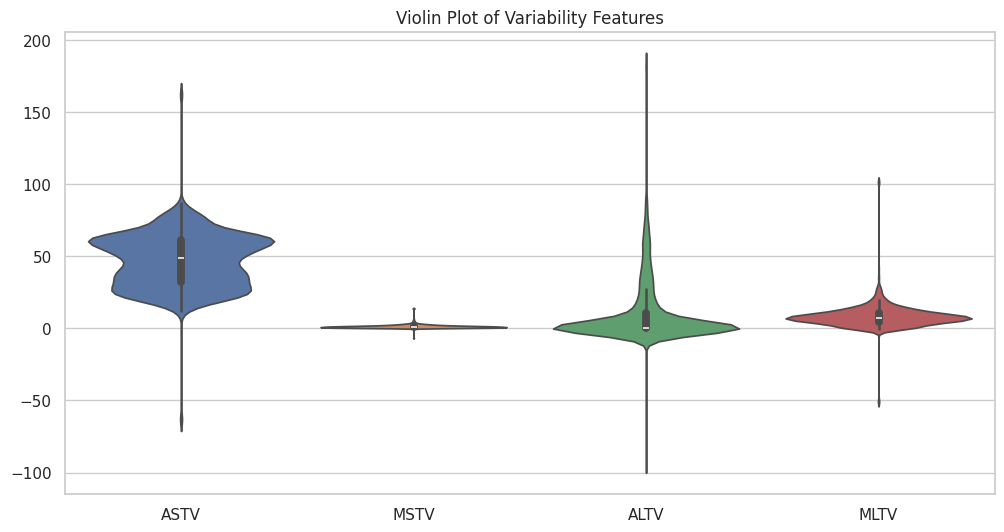

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['ASTV', 'MSTV', 'ALTV', 'MLTV']])
plt.title("Violin Plot of Variability Features")
plt.show()


11: Key Statistical Findings

Findings:

High IQR in ASTV & ALTV → high variability

MLTV has stable distribution

Deceleration features indicate potential risk patterns

In [15]:
stats = df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats


,count,mean,std,min,25%,50%,75%,max,IQR
LB,2126.0,133.343598,11.214328,51.842487,126.000000,133.000000,140.000000,214.000000,14.000000
AC,2126.0,0.003219,0.004370,-0.019284,0.000000,0.001668,0.005606,0.038567,0.005606
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.003289
DS,2126.0,0.000003,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000
DP,2126.0,0.000175,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,11.000000


## Conclusion

- Baseline fetal heart rate (LB) shows stable behavior across samples.
- Variability features (ASTV, ALTV) exhibit high dispersion, indicating abnormal patterns in some cases.
- Strong correlations exist between variability and deceleration features.
- Visualizations highlight potential indicators of fetal distress.
- Dataset is suitable for further predictive modeling or classification tasks.

This EDA provides valuable insights for clinical decision-making and advanced analytics.
